In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


## Splitting & Using NB


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)


import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()

start_time = time.time()

gnb.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time

print(f"Training time: {training_time} seconds")



Training time: 0.0 seconds


## Using Evaluation Metrics

Accuracy =  80.28169014084507 %
Precision =  0.6512612510400121
Recall =  0.7815320708639675
F1-score =  0.6908934076900689


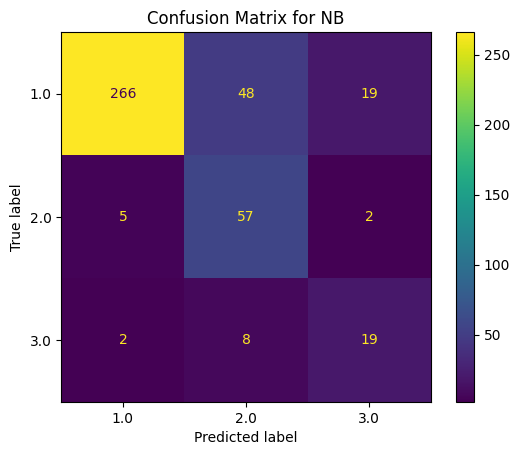

Classification Report
              precision    recall  f1-score   support

         1.0       0.97      0.80      0.88       333
         2.0       0.50      0.89      0.64        64
         3.0       0.47      0.66      0.55        29

    accuracy                           0.80       426
   macro avg       0.65      0.78      0.69       426
weighted avg       0.87      0.80      0.82       426



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for NB')
plt.show()

# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


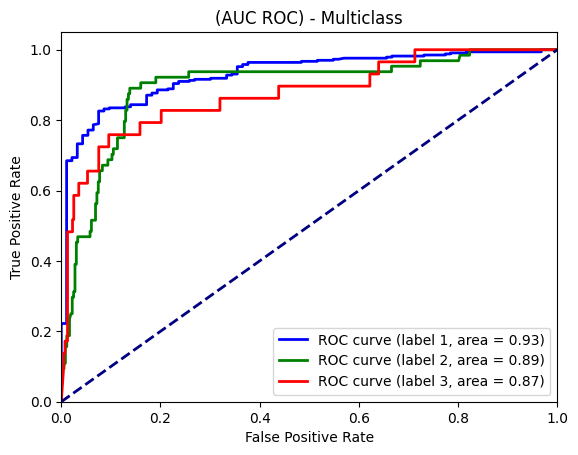

In [8]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
y_scores = naive_bayes.predict_proba(X_test)

plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


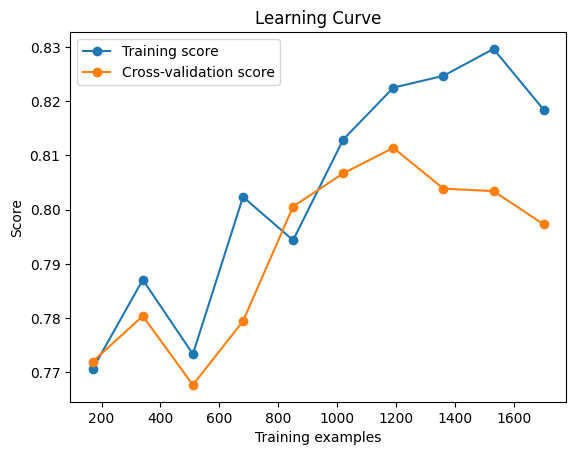

In [9]:
train_sizes, train_scores, test_scores = learning_curve(naive_bayes, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

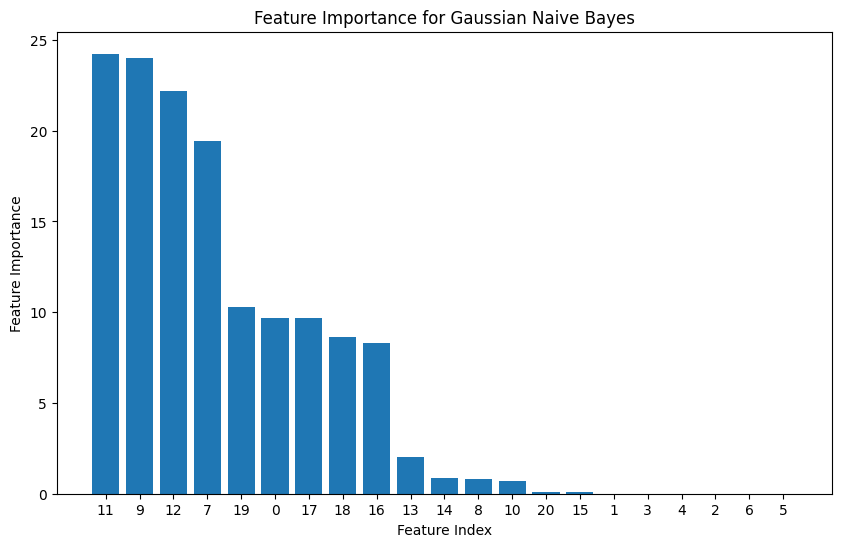

In [10]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

# Assuming X, y are your feature matrix and target variable
gnb = GaussianNB()
gnb.fit(X, y)

# Get the mean for each feature and each class
means = gnb.theta_

# Calculate a simple measure of importance (e.g., mean difference)
feature_importance = np.abs(means[1] - means[0])

# Sort features by importance
sorted_features = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_features])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Gaussian Naive Bayes')
plt.xticks(range(X.shape[1]), sorted_features) 
plt.show()


In [11]:
top_k_features_indices = sorted_features[:13]
print("Indices of Important Features:", top_k_features_indices)

X_selected = X.iloc[:, top_k_features_indices]


# print("Adjusted X based on Important Features:")
# print(X_selected)

Indices of Important Features: [11  9 12  7 19  0 17 18 16 13 14  8 10]


## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


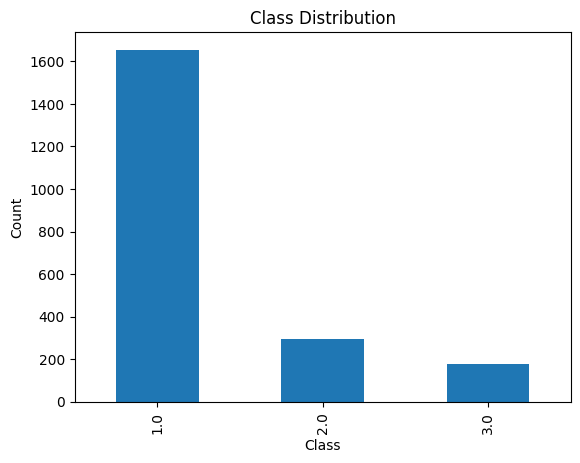

In [12]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [13]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)




Class Distribution:
fetal_health
1.0    1322
2.0    1322
3.0    1322
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


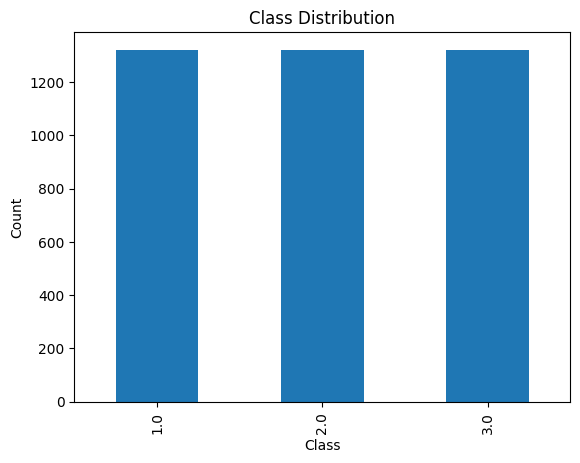

In [14]:


class_distribution = y_resampled.value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using NB

In [15]:



from sklearn.model_selection import cross_val_predict, StratifiedKFold

NB_after_smote = GaussianNB()
NB_after_smote.fit(X_resampled, y_resampled)
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# y_pred_after = cross_val_predict(NB_after_smote, X_resampled, y_resampled, cv=cv)
y_pred_full = NB_after_smote.predict(X_resampled)
y_pred_test = NB_after_smote.predict(X_test)


## Using Evaluation Metrics

Accuracy (Resampled): 74.63439233484618 %
Precision (macro, Resampled): 0.7724113368082848
Recall (macro, Resampled): 0.746343923348462
F1-score (macro, Resampled): 0.7481034383879178
Confusion Matrix (Resampled):


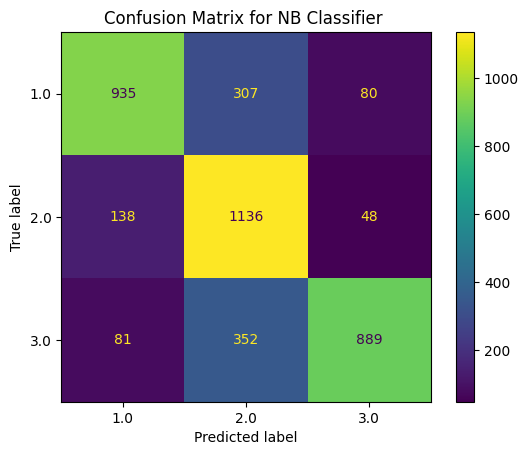

Classification Report (Resampled):
              precision    recall  f1-score   support

         1.0       0.81      0.71      0.76      1322
         2.0       0.63      0.86      0.73      1322
         3.0       0.87      0.67      0.76      1322

    accuracy                           0.75      3966
   macro avg       0.77      0.75      0.75      3966
weighted avg       0.77      0.75      0.75      3966

Test Accuracy: 69.71830985915493 %
Test Precision (macro): 0.5727170037770483
Test Recall (macro): 0.7385656130268199
Test F1-score (macro): 0.598670889361923


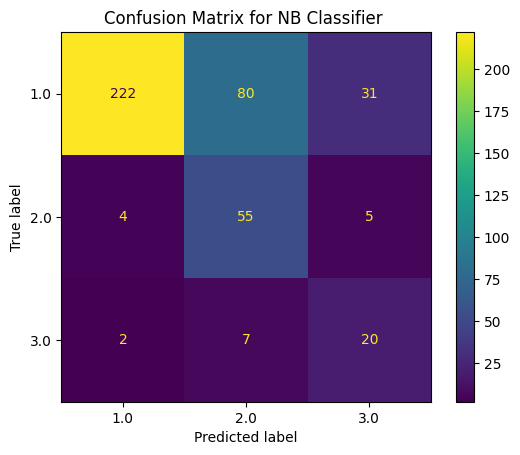

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

accuracy_resampled = accuracy_score(y_resampled, y_pred_full)
precision_resampled = precision_score(y_resampled, y_pred_full, average='macro')
recall_resampled = recall_score(y_resampled, y_pred_full, average='macro')
f1_resampled = f1_score(y_resampled, y_pred_full, average='macro')

conf_matrix_resampled = confusion_matrix(y_resampled, y_pred_full)
class_report_resampled = classification_report(y_resampled, y_pred_full)

print("Accuracy (Resampled):", accuracy_resampled * 100, "%")
print("Precision (macro, Resampled):", precision_resampled)
print("Recall (macro, Resampled):", recall_resampled)
print("F1-score (macro, Resampled):", f1_resampled)

print("Confusion Matrix (Resampled):")
conf_matrix = confusion_matrix(y_resampled, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for NB Classifier ')
plt.show()
print("Classification Report (Resampled):")
print(class_report_resampled)


test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='macro')
test_recall = recall_score(y_test, y_pred_test, average='macro')
test_f1 = f1_score(y_test, y_pred_test, average='macro')
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy * 100, "%")
print("Test Precision (macro):", test_precision)
print("Test Recall (macro):", test_recall)
print("Test F1-score (macro):", test_f1)

conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for NB Classifier ')
plt.show()



In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# k-Fold with SMOTE
kf = KFold(n_splits=4, shuffle=True, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
accuracy_scores_kfold = []
precision_scores_kfold = []
recall_scores_kfold = []
f1_scores_kfold = []

for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE only on the training set
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Naive Bayes on resampled training set
    naive_bayes_after = GaussianNB()
    naive_bayes_after.fit(X_train_resampled, y_train_resampled)

    # Predictions on the test set
    y_pred_test = naive_bayes_after.predict(X_test)

    # Calculate metrics for the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    accuracy_scores_kfold.append(accuracy_test)
    precision_scores_kfold.append(precision_test)
    recall_scores_kfold.append(recall_test)
    f1_scores_kfold.append(f1_test)

# Calculate mean scores across folds
mean_accuracy_kfold = np.mean(accuracy_scores_kfold)
mean_precision_kfold = np.mean(precision_scores_kfold)
mean_recall_kfold = np.mean(recall_scores_kfold)
mean_f1_kfold = np.mean(f1_scores_kfold)

print(f'k-Fold Metrics (Mean): Accuracy={mean_accuracy_kfold}, Precision={mean_precision_kfold}, Recall={mean_recall_kfold}, F1-Score={mean_f1_kfold}')


# Stratified k-Fold with SMOTE
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
accuracy_scores_stratified_kfold = []
precision_scores_stratified_kfold = []
recall_scores_stratified_kfold = []
f1_scores_stratified_kfold = []

for train_index, test_index in skf.split(X_selected, y):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE only on the training set
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Naive Bayes on resampled training set
    naive_bayes_after = GaussianNB()
    naive_bayes_after.fit(X_train_resampled, y_train_resampled)

    # Predictions on the test set
    y_pred_test = naive_bayes_after.predict(X_test)

    # Calculate metrics for the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    accuracy_scores_stratified_kfold.append(accuracy_test)
    precision_scores_stratified_kfold.append(precision_test)
    recall_scores_stratified_kfold.append(recall_test)
    f1_scores_stratified_kfold.append(f1_test)

# Calculate mean scores across folds
mean_accuracy_stratified_kfold = np.mean(accuracy_scores_stratified_kfold)
mean_precision_stratified_kfold = np.mean(precision_scores_stratified_kfold)
mean_recall_stratified_kfold = np.mean(recall_scores_stratified_kfold)
mean_f1_stratified_kfold = np.mean(f1_scores_stratified_kfold)

print(f'Stratified k-Fold Metrics (Mean): Accuracy={mean_accuracy_stratified_kfold}, Precision={mean_precision_stratified_kfold}, Recall={mean_recall_stratified_kfold}, F1-Score={mean_f1_stratified_kfold}')


k-Fold Metrics (Mean): Accuracy=0.7159008042705635, Precision=0.6013365651858968, Recall=0.7335915298427776, F1-Score=0.6227327224257342
Stratified k-Fold Metrics (Mean): Accuracy=0.7144963397193549, Precision=0.6039691803681645, Recall=0.7383744250245698, F1-Score=0.6267170834997358


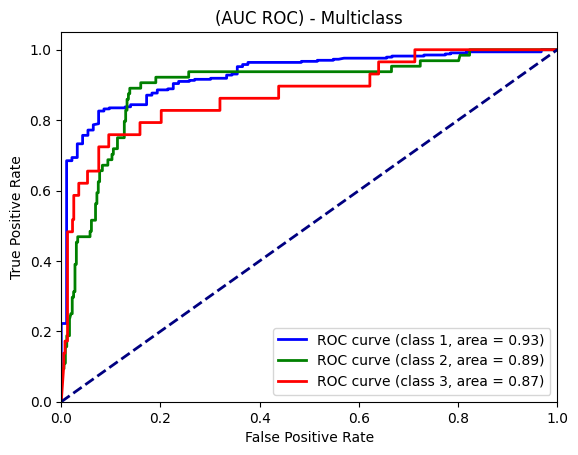

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NB_after_smote = GaussianNB()
NB_after_smote.fit(X_train, y_train)

y_scores = NB_after_smote.predict_proba(X_test)

y_test_binarized = label_binarize(y_test, classes=np.unique(y))

plt.figure()

n_classes = y_test_binarized.shape[1]
colors = ['b', 'g', 'r']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve (class {i+1}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


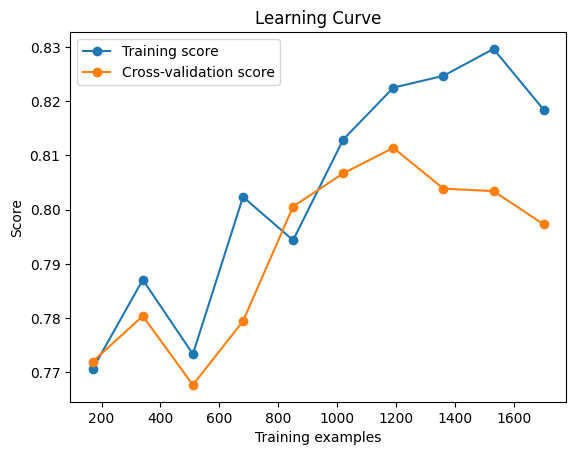

In [19]:
train_sizes, train_scores, test_scores = learning_curve(NB_after_smote, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

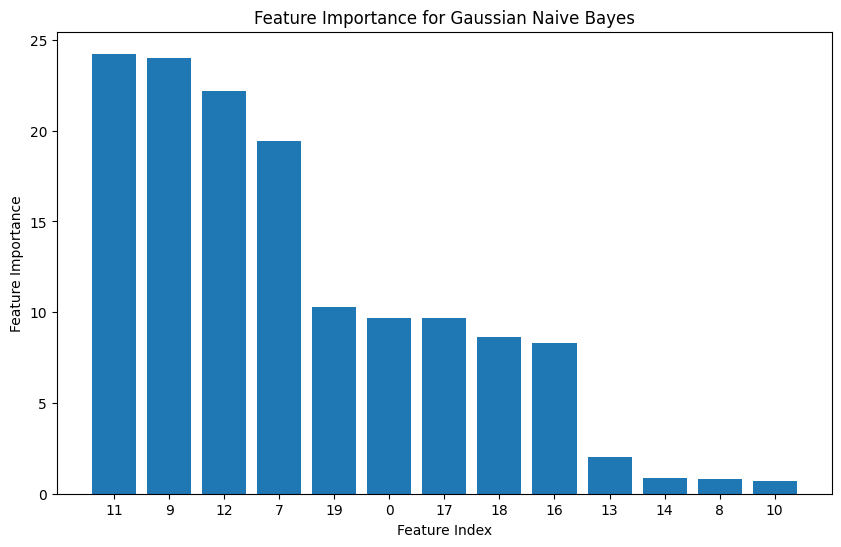

In [20]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

gnb = GaussianNB()
gnb.fit(X, y)

means = gnb.theta_


sorted_features = np.argsort(feature_importance)[::-1]
num_features_to_plot = 13

plt.figure(figsize=(10, 6))
plt.bar(range(num_features_to_plot), feature_importance[sorted_features[:num_features_to_plot]])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Gaussian Naive Bayes')
plt.xticks(range(num_features_to_plot), sorted_features[:num_features_to_plot])  
plt.show()